# Linear regression and least squares approximations

Consider a quadratic polynomial:  

$$ f(x) = \alpha_0 + \alpha_1 x + \alpha_2 x^2. $$

Here is a plot of this function:

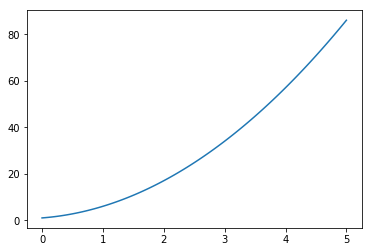

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

def f(x): 
    alpha0 = 1
    alpha1 = 2
    alpha2 = 3
    return alpha0 + alpha1*x + alpha2*x**2

x_curve = np.linspace(0,5,100)
y_f = f(x_curve)

plt.plot(x_curve, y_f) 

Let's generate some random data that are scattered about this quadratic curve: 

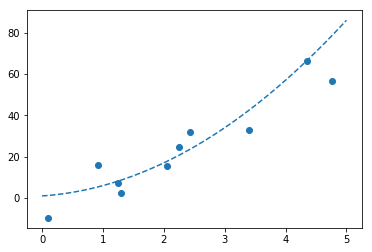

In [2]:
np.random.seed(33) # Setting a seed allows reproducability

def reshape_1d_array(x): # helper function
    return x.reshape(len(x),1)

def generate_data(n=10, std=10): 
    x = np.random.uniform(0,5,n)
    y = f(x) + np.random.normal(0,std,len(x))
    x = reshape_1d_array(x) 
    y = reshape_1d_array(y)   
    return x, y

def plot_data_and_curve(): 
    x_examples, y_examples = generate_data() 
    plt.scatter(x_examples, y_examples) # plot data
    plt.plot(x_curve, y_f, '--') # plot curve
plot_data_and_curve()

### Problem 1 

In class, we computed the difference between the y-values of a set of data points and the corresponding y-values of a function $h(x)$,

$$ \sum_{i=1}^n \left[y^{(i)} - h(x^{(i)}) \right]^2. $$ 

Fill in the following code so that it computes this sum of squared errors. Assume that the arguments `xs` and `ys` are the $x$- and $y$-coordinates of a set of data points. Assume that the argument `h` is a Python function that takes a single value ($x$) and returns a single value ($y$).

### Solution

sum of squared errors for f =  1069.71655916


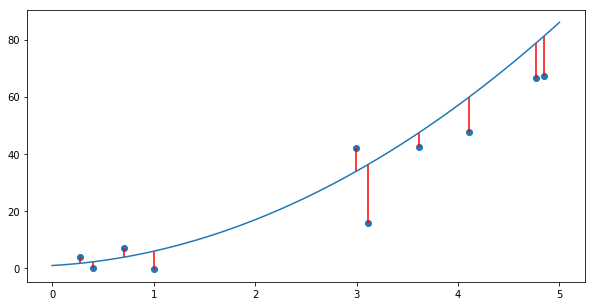

In [3]:
def compute_sum_of_squares(xs, ys, h, h_name):
    sum_of_squares = 0.0
    for i, x in enumerate(xs): 
        sum_of_squares += (h(x) - ys[i])**2
    print 'sum of squared errors for', h_name, '= ', float(sum_of_squares)

def plot_data_and_curve_with_errors(): 
    plt.figure().set_size_inches(10,5)
    x_examples, y_examples = generate_data()
    plt.scatter(x_examples, y_examples) # data
    plt.plot(x_curve, y_f) # curve
    for i, x_example in enumerate(x_examples):
        plt.vlines(x_example, f(x_example), y_examples[i], colors='red')
    compute_sum_of_squares(x_examples, y_examples, f, 'f')
    
plot_data_and_curve_with_errors() 

### Problem 2

In class, we parametrized $h$ by $\theta$, e.g. 

$$ h(x) = \theta_0 + \theta_1 x + \theta_2 x^2. $$

We then derived the 'normal equations', 

$$ X^T X \theta = X^T y. $$

The solution $\theta$ parameterizes the $h$ that minimizes the sum of squared errors between it and the data points. 

Complete the following Python function so that it solves the normal equations. Assume that `xs` and `ys` are 1D numpy arrays representing the $x$- and $y$-coordinates of the data points. The function should return the column vector $\theta$. [Hint: make use of `np.concatenate` and `np.linalg.inv`.]

### Solution

In [4]:
def solve_normal_equations(xs, ys):
    m = xs.shape[0]
    X = np.concatenate((np.ones((m,1)), xs, xs**2), axis=1)
    XtX = np.dot(X.transpose(), X)
    invXtX = np.linalg.inv(XtX)
    XtY = np.dot(X.transpose(), ys)
    return np.dot(invXtX, XtY)

### Problem 3

Fill in the following function so that it plots the data along with both $f(x)$ and the $h(x)$ that corresponds to the solution of the normal equations, i.e. the best-fit quadratic polynomial. Do $f$ and $h$ overlap when the number of data points is 10? What if the number of data points is increased? What do you observe and why? 

### Solution


sum of squared errors for f =  741.772198762
sum of squared errors for h =  315.356115838


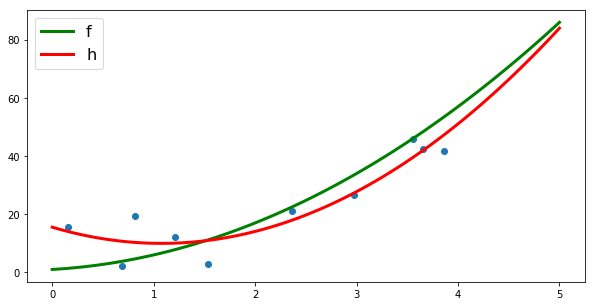

In [5]:
def plot_data_and_two_curves(n=1000, std=10, 
                             compute_theta=solve_normal_equations): 
    x_examples, y_examples = generate_data(n, std)
    thetas = compute_theta(x_examples, y_examples)
    h = lambda x: thetas[0] + thetas[1]*x + thetas[2]*x**2
    xs = np.linspace(0,5,100)

    plt.figure().set_size_inches(10,5)
    plt.scatter(x_examples, y_examples) # data
    plt.plot(xs, f(xs), 'green', linewidth=3) # true curve
    plt.plot(xs, h(xs), 'red', linewidth=3) # fitted curve
    plt.legend(['f', 'h'],fontsize=16)
    
    compute_sum_of_squares(x_examples, y_examples, f, 'f')
    compute_sum_of_squares(x_examples, y_examples, h, 'h')

plot_data_and_two_curves(n=10)

sum of squared errors for f =  9032.54790824
sum of squared errors for h =  8762.07873356


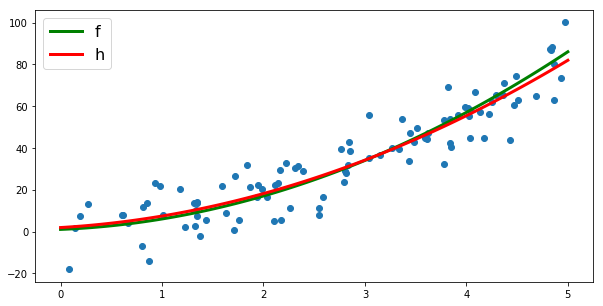

In [6]:
plot_data_and_two_curves(n=100)

sum of squared errors for f =  100997.625581
sum of squared errors for h =  100921.280916


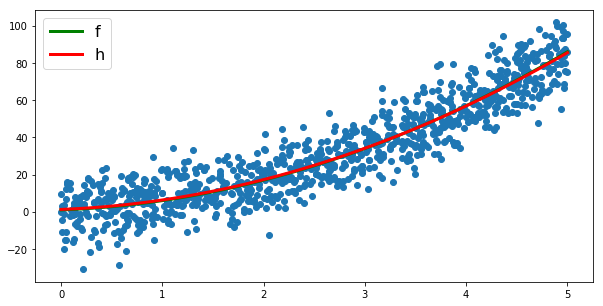

In [7]:
plot_data_and_two_curves(n=1000)

### The scikit-learn way 

As you might suspect, linear regression is such a basic tool in data analysis that there are libraries that do the hard work of computing the best fit polynomial to a data set. I've outlined how below, but to run the code you'll first need to install the package `scikit-learn` using the following command: 

```
conda install scikit-learn
```

sum of squared errors for f =  105478.572841
sum of squared errors for h =  112832.754456


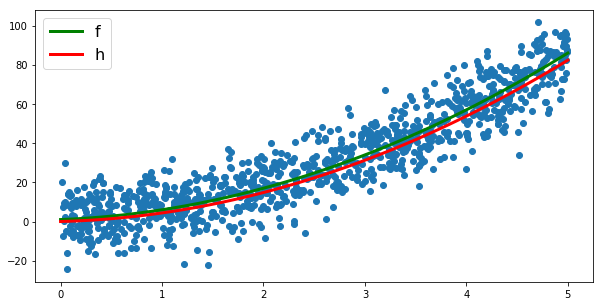

In [8]:
from sklearn import linear_model

def compute_theta_sklearn(xs, ys):
    model = linear_model.LinearRegression()
    m = xs.shape[0]
    X = np.concatenate((np.ones((m,1)), xs, xs**2), axis=1)
    model.fit(X, ys)
    return model.coef_.transpose()

plot_data_and_two_curves(n=1000, compute_theta=compute_theta_sklearn)